## Importing Libraries

In [1724]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTENC

from sklearn.model_selection import train_test_split, cross_val_score , GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler , OneHotEncoder , MinMaxScaler ,OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report , roc_auc_score, RocCurveDisplay, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings('ignore')

In [1725]:
df = pd.read_csv(f'E:\DS_course_data\Machine Learning\ML_PROJECT\Rheumatoid arthritis\Dataset\The final data after screening.csv')

## Data Understanding

In [1726]:
df.head()

,SEQN,RheumatoidArthritis,BRI,Gender,Age,Race,EducationLevel,MaritalStatus,FamilyIncome,PhysicalActivity,...,ProteinConsumption,CarbohydrateConsumption,FatConsumption,CaffeineConsumption,FiberConsumption,PSU,STRATA,BRI_Grp,BRI_Trend,Weight
0,62161,0,2.815371,Male,22,Non-Hispanic White,High school graduate,Living Alone,"(1.3,3.5]",Other,...,104.68,359.59,123.81,0,18.6,1,91,"[1.049, 3.666]",0,22313.349230
1,62169,0,2.017701,Male,21,Other,High school graduate,Living Alone,PIR <= 1.3,Other,...,77.46,297.51,34.61,40,4.3,1,92,"[1.049, 3.666]",0,3128.647493
2,62172,0,7.888557,Female,43,Non-Hispanic Black,High school graduate,Living Alone,"(1.3,3.5]",Sedentary,...,57.43,192.82,42.02,54,2.8,2,96,"(6.477, 20.970]",3,5861.037901
3,62176,0,3.760754,Female,34,Non-Hispanic White,Above high school,Living With A Partner,PIR > 3.5,Vigorous activity,...,144.81,281.44,112.90,197,41.9,1,99,"(3.666, 4.924]",1,11702.304220
4,62178,1,6.569817,Male,80,Non-Hispanic White,High school graduate,Living Alone,PIR <= 1.3,Other,...,48.71,302.33,79.97,17,14.0,1,95,"(6.477, 20.970]",3,2671.990112


In [1727]:
df.shape

(13273, 27)

In [1728]:
df.dtypes.value_counts()

object     12
int64       8
float64     7
Name: count, dtype: int64

In [1729]:
df.isnull().sum()

SEQN                       0
RheumatoidArthritis        0
BRI                        0
Gender                     0
Age                        0
Race                       0
EducationLevel             0
MaritalStatus              0
FamilyIncome               0
PhysicalActivity           0
SmokingStatus              0
BMI                        0
DrinkingStatus             0
Hypertension               0
Diabetes                   0
Hyperlipidemia             0
CalorieConsumption         0
ProteinConsumption         0
CarbohydrateConsumption    0
FatConsumption             0
CaffeineConsumption        0
FiberConsumption           0
PSU                        0
STRATA                     0
BRI_Grp                    0
BRI_Trend                  0
Weight                     0
dtype: int64

In [1730]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13273 entries, 0 to 13272
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SEQN                     13273 non-null  int64  
 1   RheumatoidArthritis      13273 non-null  int64  
 2   BRI                      13273 non-null  float64
 3   Gender                   13273 non-null  object 
 4   Age                      13273 non-null  int64  
 5   Race                     13273 non-null  object 
 6   EducationLevel           13273 non-null  object 
 7   MaritalStatus            13273 non-null  object 
 8   FamilyIncome             13273 non-null  object 
 9   PhysicalActivity         13273 non-null  object 
 10  SmokingStatus            13273 non-null  object 
 11  BMI                      13273 non-null  float64
 12  DrinkingStatus           13273 non-null  object 
 13  Hypertension             13273 non-null  object 
 14  Diabetes              

In [1731]:
df.duplicated().sum()

np.int64(0)

In [1732]:
df.drop(columns = ['SEQN', 'PSU', 'STRATA', 'BRI_Grp', 'BRI_Trend', 'Weight'], inplace = True)

In [1733]:
df.columns

Index(['RheumatoidArthritis', 'BRI', 'Gender', 'Age', 'Race', 'EducationLevel',
       'MaritalStatus', 'FamilyIncome', 'PhysicalActivity', 'SmokingStatus',
       'BMI', 'DrinkingStatus', 'Hypertension', 'Diabetes', 'Hyperlipidemia',
       'CalorieConsumption', 'ProteinConsumption', 'CarbohydrateConsumption',
       'FatConsumption', 'CaffeineConsumption', 'FiberConsumption'],
      dtype='object')

In [1734]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RheumatoidArthritis,13273.0,0.062533,0.242130,0.000000,0.000000,0.000000,0.000000,1.000000
BRI,13273.0,5.317289,2.328315,1.048869,3.665968,4.924353,6.476923,20.970057
Age,13273.0,45.123032,16.696345,20.000000,31.000000,43.000000,58.000000,80.000000
BMI,13273.0,28.887750,6.869709,14.100000,24.000000,27.800000,32.400000,82.000000
CalorieConsumption,13273.0,2178.910872,1020.844450,0.000000,1489.000000,2006.000000,2668.000000,13687.000000
ProteinConsumption,13273.0,83.273651,44.208148,0.000000,53.630000,75.330000,103.170000,557.870000
CarbohydrateConsumption,13273.0,256.412823,127.097817,0.000000,169.470000,235.830000,317.330000,1815.020000
FatConsumption,13273.0,84.772704,48.666870,0.000000,51.420000,75.970000,108.000000,553.790000
CaffeineConsumption,13273.0,136.733218,182.296488,0.000000,9.000000,90.000000,194.000000,4320.000000
FiberConsumption,13273.0,17.074934,10.998244,0.000000,9.500000,14.700000,22.000000,136.300000


In [1735]:
cols = df.columns
cols

Index(['RheumatoidArthritis', 'BRI', 'Gender', 'Age', 'Race', 'EducationLevel',
       'MaritalStatus', 'FamilyIncome', 'PhysicalActivity', 'SmokingStatus',
       'BMI', 'DrinkingStatus', 'Hypertension', 'Diabetes', 'Hyperlipidemia',
       'CalorieConsumption', 'ProteinConsumption', 'CarbohydrateConsumption',
       'FatConsumption', 'CaffeineConsumption', 'FiberConsumption'],
      dtype='object')

In [1736]:
cat_cols = df.select_dtypes('object').columns
for col in cat_cols:
    print("----------------------------")
    print(col, " → ", df[col].unique())
    print(df[col].value_counts())
    print()

----------------------------
Gender  →  ['Male' 'Female']
Gender
Male      6847
Female    6426
Name: count, dtype: int64

----------------------------
Race  →  ['Non-Hispanic White' 'Other' 'Non-Hispanic Black' 'Mexican American']
Race
Non-Hispanic White    4778
Other                 3574
Non-Hispanic Black    3117
Mexican American      1804
Name: count, dtype: int64

----------------------------
EducationLevel  →  ['High school graduate' 'Above high school' 'Below high school']
EducationLevel
Above high school       7962
High school graduate    2940
Below high school       2371
Name: count, dtype: int64

----------------------------
MaritalStatus  →  ['Living Alone' 'Living With A Partner']
MaritalStatus
Living With A Partner    7845
Living Alone             5428
Name: count, dtype: int64

----------------------------
FamilyIncome  →  ['(1.3,3.5]' 'PIR <= 1.3' 'PIR > 3.5']
FamilyIncome
(1.3,3.5]     4908
PIR > 3.5     4316
PIR <= 1.3    4049
Name: count, dtype: int64

----------------

In [1737]:
df['RheumatoidArthritis'].value_counts()

RheumatoidArthritis
0    12443
1      830
Name: count, dtype: int64

In [1738]:
df['RheumatoidArthritis'].value_counts(normalize=True) * 100

RheumatoidArthritis
0    93.746704
1     6.253296
Name: proportion, dtype: float64

In [1739]:
df[['BRI','Age','CalorieConsumption' ,'CaffeineConsumption']].skew()

BRI                    1.218270
Age                    0.347654
CalorieConsumption     1.622224
CaffeineConsumption    5.042350
dtype: float64

# Data Analysis

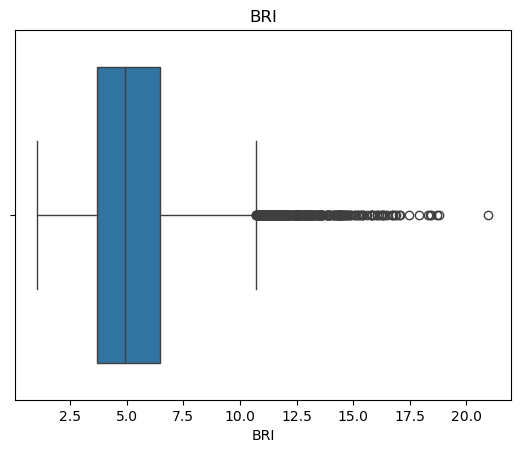

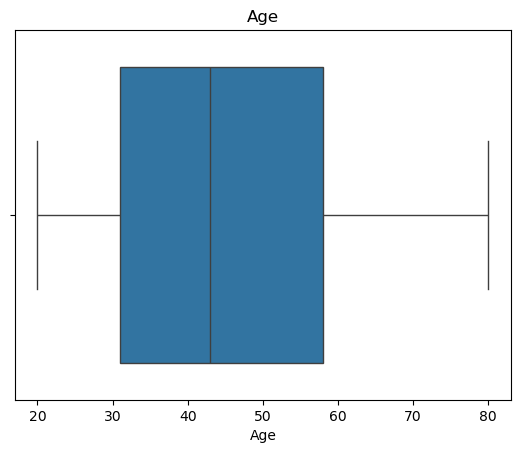

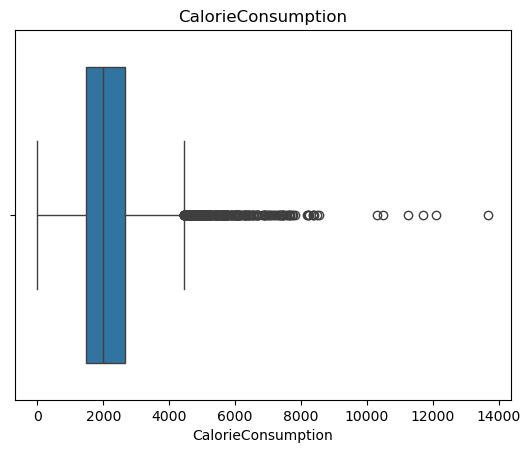

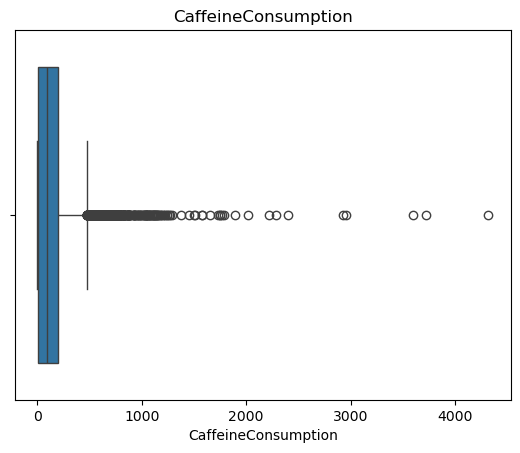

In [1740]:
for col in ['BRI','Age','CalorieConsumption','CaffeineConsumption']:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

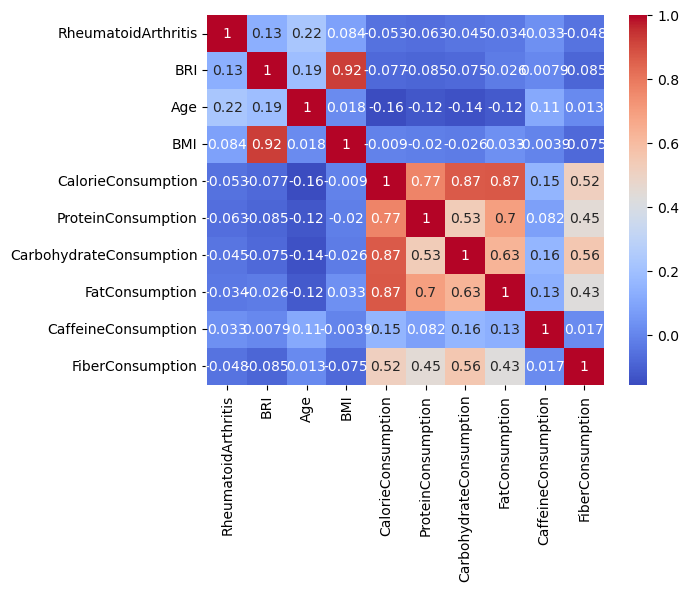

In [1741]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

In [1742]:
df.drop(columns = ['ProteinConsumption', 'CarbohydrateConsumption','FatConsumption', 'FiberConsumption', 'BMI'], inplace = True)

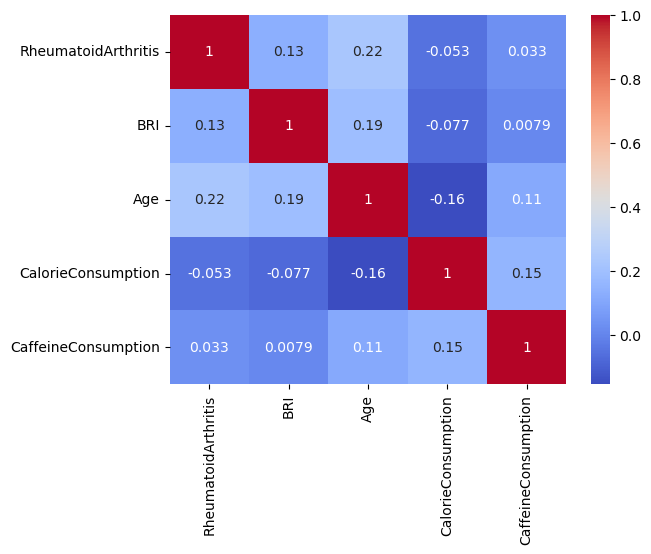

In [1743]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

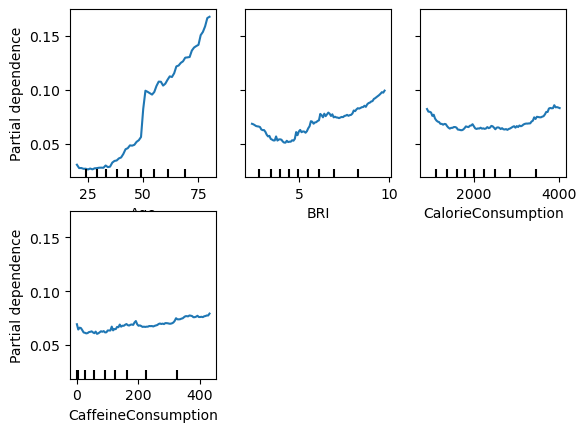

In [1794]:
from sklearn.inspection import PartialDependenceDisplay

X_full = df.drop(columns=['RheumatoidArthritis'])
y_full = df['RheumatoidArthritis']

model = RandomForestClassifier(
    n_estimators=300,
    random_state=42
).fit(X_full, y_full)

features_to_plot = ['Age', 'BRI', 'CalorieConsumption', 'CaffeineConsumption']

PartialDependenceDisplay.from_estimator(
    model,
    X_full,
    features_to_plot,
    kind='average'
)

plt.show()

In [1744]:
num_cols = df.select_dtypes(exclude='object').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

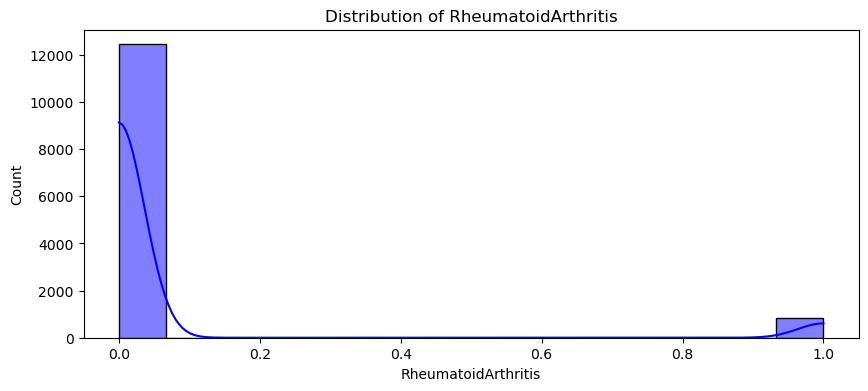

RheumatoidArthritis → Mean: 0.06
, Median: 0.00
, Skew: 3.61
, Kurtosis: 11.06


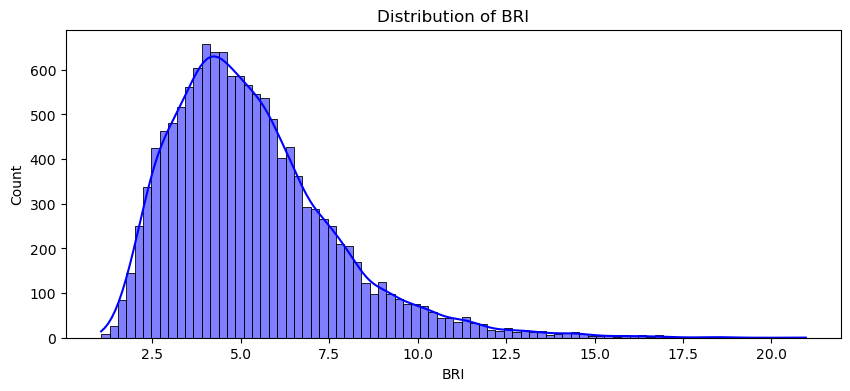

BRI → Mean: 5.32
, Median: 4.92
, Skew: 1.22
, Kurtosis: 2.41


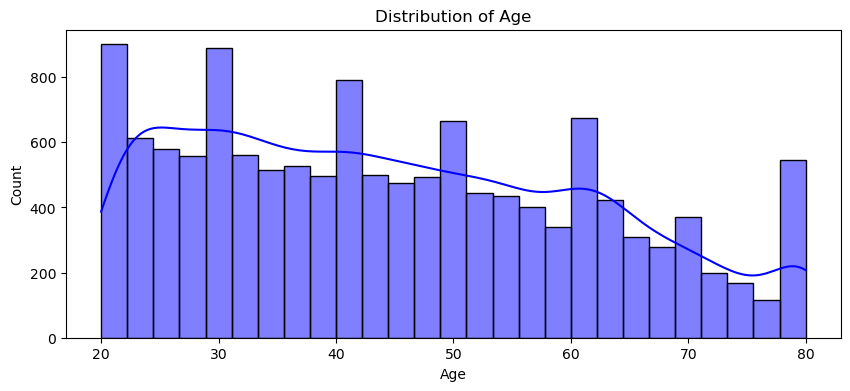

Age → Mean: 45.12
, Median: 43.00
, Skew: 0.35
, Kurtosis: -0.90


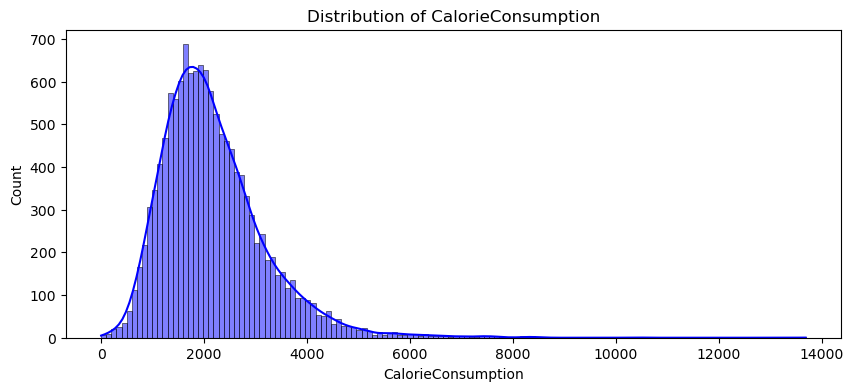

CalorieConsumption → Mean: 2178.91
, Median: 2006.00
, Skew: 1.62
, Kurtosis: 6.56


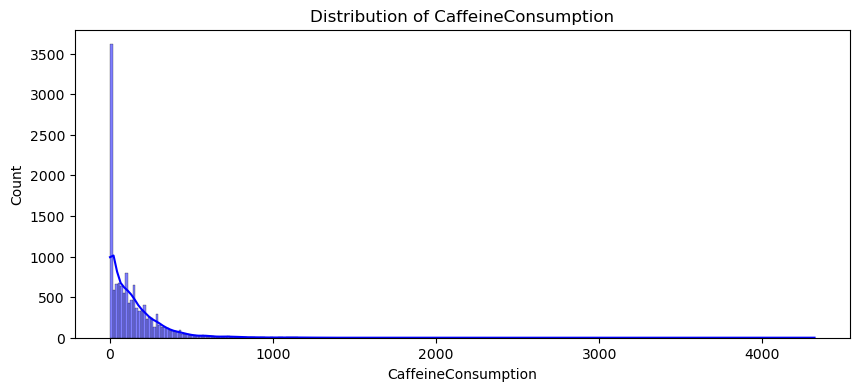

CaffeineConsumption → Mean: 136.73
, Median: 90.00
, Skew: 5.04
, Kurtosis: 63.71


In [1745]:
for col in num_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f"Distribution of {col}")
    plt.show()

    mean = df[col].mean()
    median = df[col].median()
    skewness = df[col].skew()
    kurtosis = df[col].kurt()
    print(f"{col} → Mean: {mean:.2f}\n, Median: {median:.2f}\n, Skew: {skewness:.2f}\n, Kurtosis: {kurtosis:.2f}")

In [1746]:
def outlier_summary(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = ((series < lower) | (series > upper)).sum()
    return outliers

print("\n--> Outlier counts per feature:")
for col in num_cols:
    print(f"{col}: {outlier_summary(df[col])}")


--> Outlier counts per feature:
RheumatoidArthritis: 830
BRI: 404
Age: 0
CalorieConsumption: 387
CaffeineConsumption: 537


In [1747]:
cat_cols = ['Gender','Race','EducationLevel','MaritalStatus','FamilyIncome',
            'PhysicalActivity','SmokingStatus','DrinkingStatus',
            'Hypertension','Diabetes','Hyperlipidemia']

for col in cat_cols:
    print(f"\n--- {col} vs RA ---")
    print(pd.crosstab(df[col], df['RheumatoidArthritis'], normalize='index'))


--- Gender vs RA ---
RheumatoidArthritis         0         1
Gender                                 
Female               0.926082  0.073918
Male                 0.948152  0.051848

--- Race vs RA ---
RheumatoidArthritis         0         1
Race                                   
Mexican American     0.945676  0.054324
Non-Hispanic Black   0.912095  0.087905
Non-Hispanic White   0.937212  0.062788
Other                0.955792  0.044208

--- EducationLevel vs RA ---
RheumatoidArthritis          0         1
EducationLevel                          
Above high school     0.948003  0.051997
Below high school     0.915226  0.084774
High school graduate  0.926871  0.073129

--- MaritalStatus vs RA ---
RheumatoidArthritis           0         1
MaritalStatus                            
Living Alone           0.932203  0.067797
Living With A Partner  0.941109  0.058891

--- FamilyIncome vs RA ---
RheumatoidArthritis         0         1
FamilyIncome                           
(1.3,3.5]         

In [1748]:
df.columns

Index(['RheumatoidArthritis', 'BRI', 'Gender', 'Age', 'Race', 'EducationLevel',
       'MaritalStatus', 'FamilyIncome', 'PhysicalActivity', 'SmokingStatus',
       'DrinkingStatus', 'Hypertension', 'Diabetes', 'Hyperlipidemia',
       'CalorieConsumption', 'CaffeineConsumption'],
      dtype='object')

In [1749]:
cat_cols.remove('Race')



===== Gender vs RheumatoidArthritis =====

Counts:
RheumatoidArthritis     0    1
Gender                        
Female               5951  475
Male                 6492  355

Percentage Row-wise:
RheumatoidArthritis          0         1
Gender                                  
Female               92.608154  7.391846
Male                 94.815248  5.184752


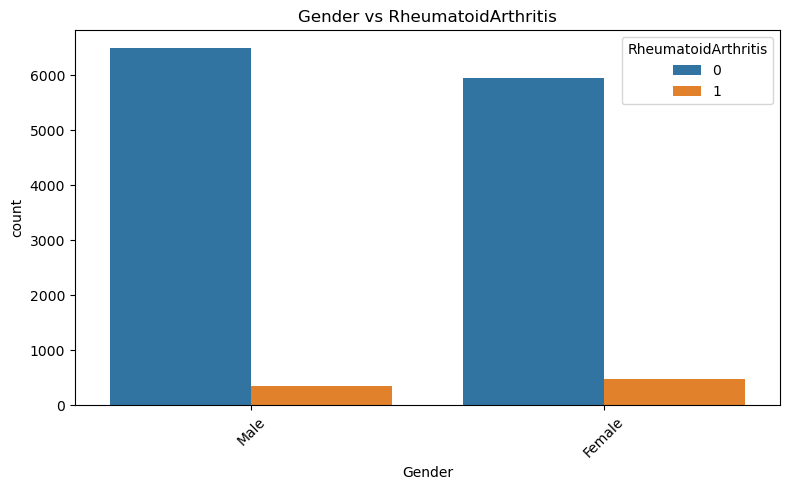



===== EducationLevel vs RheumatoidArthritis =====

Counts:
RheumatoidArthritis      0    1
EducationLevel                 
Above high school     7548  414
Below high school     2170  201
High school graduate  2725  215

Percentage Row-wise:
RheumatoidArthritis           0         1
EducationLevel                           
Above high school     94.800301  5.199699
Below high school     91.522564  8.477436
High school graduate  92.687075  7.312925


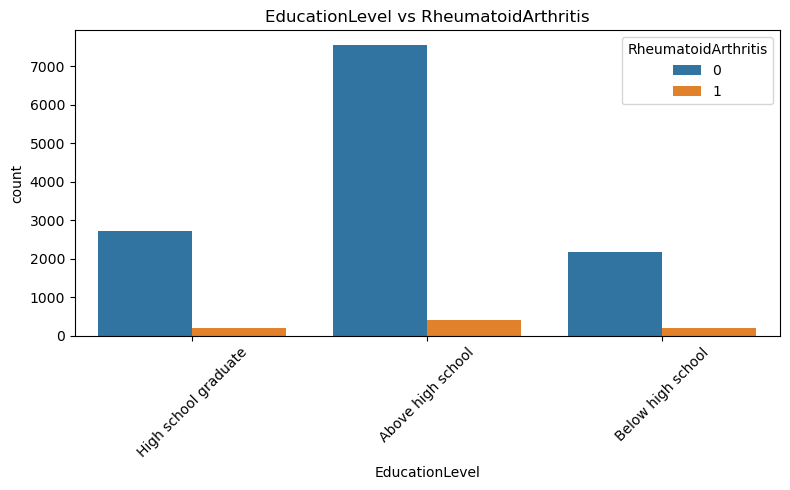



===== MaritalStatus vs RheumatoidArthritis =====

Counts:
RheumatoidArthritis       0    1
MaritalStatus                   
Living Alone           5060  368
Living With A Partner  7383  462

Percentage Row-wise:
RheumatoidArthritis            0         1
MaritalStatus                             
Living Alone           93.220339  6.779661
Living With A Partner  94.110899  5.889101


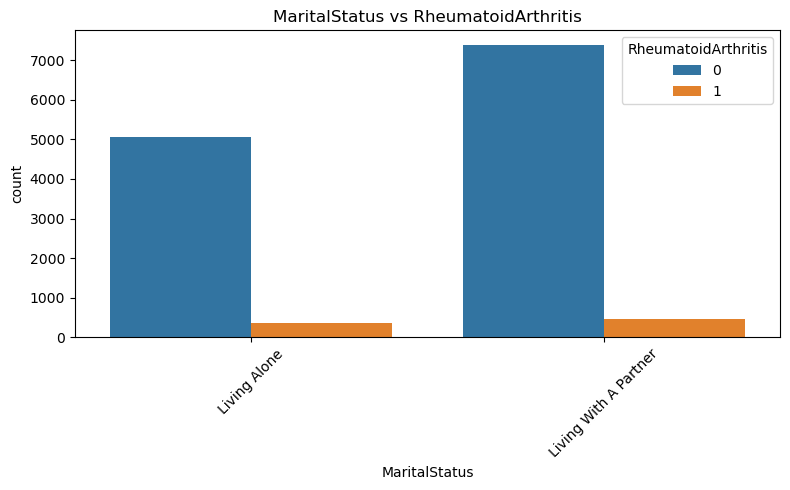



===== FamilyIncome vs RheumatoidArthritis =====

Counts:
RheumatoidArthritis     0    1
FamilyIncome                  
(1.3,3.5]            4623  285
PIR <= 1.3           3715  334
PIR > 3.5            4105  211

Percentage Row-wise:
RheumatoidArthritis          0         1
FamilyIncome                            
(1.3,3.5]            94.193154  5.806846
PIR <= 1.3           91.751050  8.248950
PIR > 3.5            95.111214  4.888786


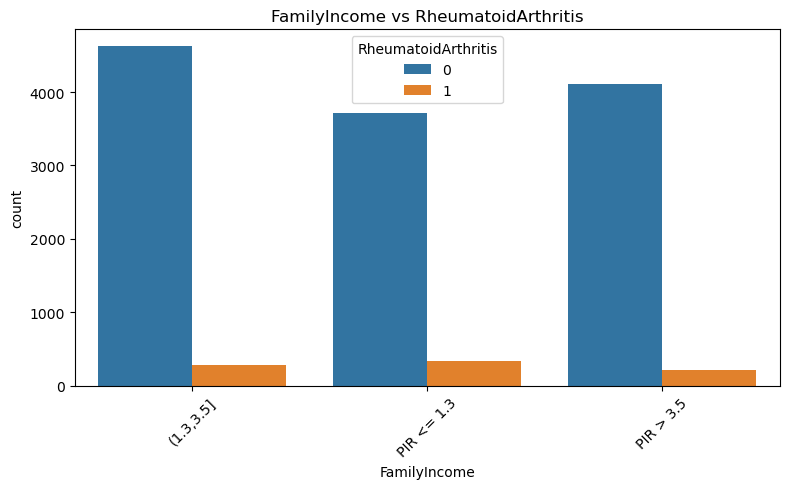



===== PhysicalActivity vs RheumatoidArthritis =====

Counts:
RheumatoidArthritis     0    1
PhysicalActivity              
Moderate activity    3156  228
Other                4599  416
Sedentary             998   90
Vigorous activity    3690   96

Percentage Row-wise:
RheumatoidArthritis          0         1
PhysicalActivity                        
Moderate activity    93.262411  6.737589
Other                91.704885  8.295115
Sedentary            91.727941  8.272059
Vigorous activity    97.464342  2.535658


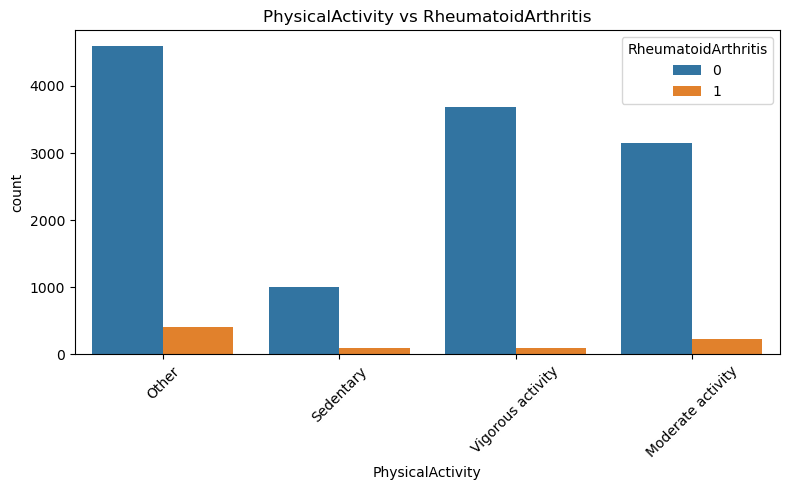



===== SmokingStatus vs RheumatoidArthritis =====

Counts:
RheumatoidArthritis     0    1
SmokingStatus                 
Current              2379  187
Former               2403  231
Never                7661  412

Percentage Row-wise:
RheumatoidArthritis          0         1
SmokingStatus                           
Current              92.712393  7.287607
Former               91.230068  8.769932
Never                94.896569  5.103431


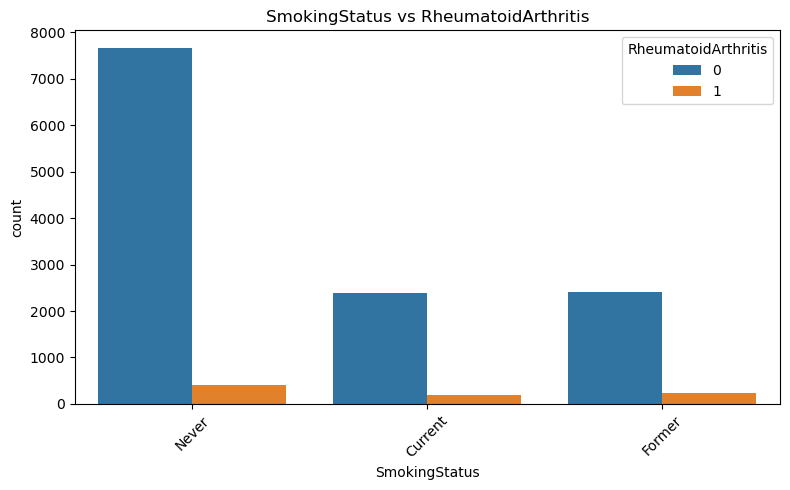



===== DrinkingStatus vs RheumatoidArthritis =====

Counts:
RheumatoidArthritis     0    1
DrinkingStatus                
Almost non-drinker   2810  278
Frequent drinker     3968  214
Occasional drinker   5665  338

Percentage Row-wise:
RheumatoidArthritis          0         1
DrinkingStatus                          
Almost non-drinker   90.997409  9.002591
Frequent drinker     94.882831  5.117169
Occasional drinker   94.369482  5.630518


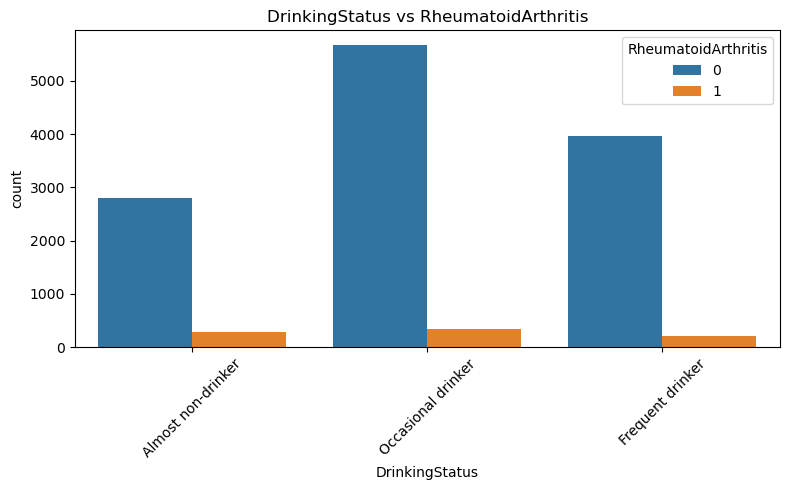



===== Hypertension vs RheumatoidArthritis =====

Counts:
RheumatoidArthritis     0    1
Hypertension                  
Hypertension         3338  494
Normal               9105  336

Percentage Row-wise:
RheumatoidArthritis          0          1
Hypertension                             
Hypertension         87.108559  12.891441
Normal               96.441055   3.558945


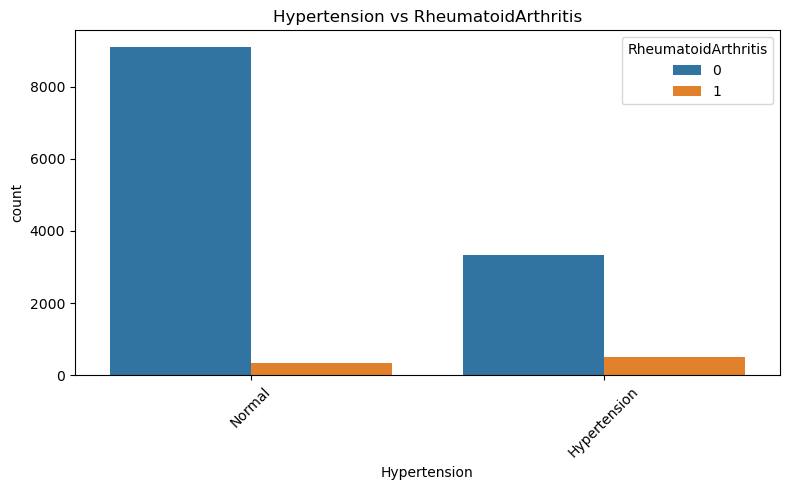



===== Diabetes vs RheumatoidArthritis =====

Counts:
RheumatoidArthritis      0    1
Diabetes                       
Diabetes              1204  227
Normal               10426  528
Prediabetes            813   75

Percentage Row-wise:
RheumatoidArthritis          0          1
Diabetes                                 
Diabetes             84.136967  15.863033
Normal               95.179843   4.820157
Prediabetes          91.554054   8.445946


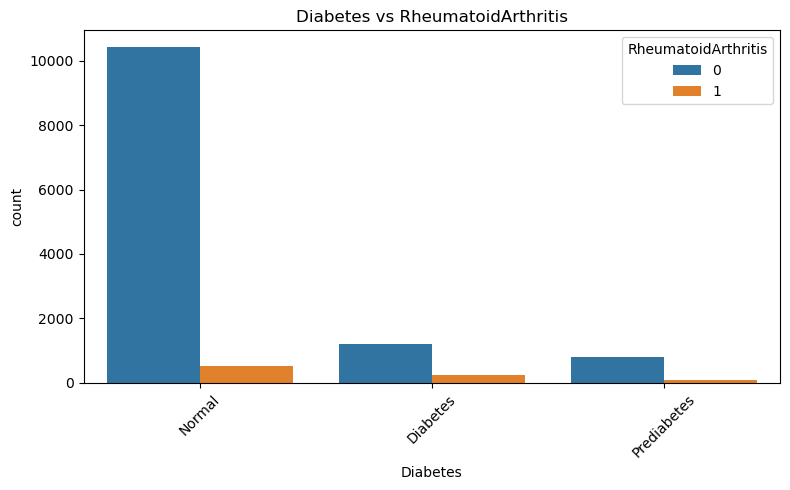



===== Hyperlipidemia vs RheumatoidArthritis =====

Counts:
RheumatoidArthritis     0    1
Hyperlipidemia                
Hyperlipidemia       7923  664
Normal               4520  166

Percentage Row-wise:
RheumatoidArthritis          0         1
Hyperlipidemia                          
Hyperlipidemia       92.267381  7.732619
Normal               96.457533  3.542467


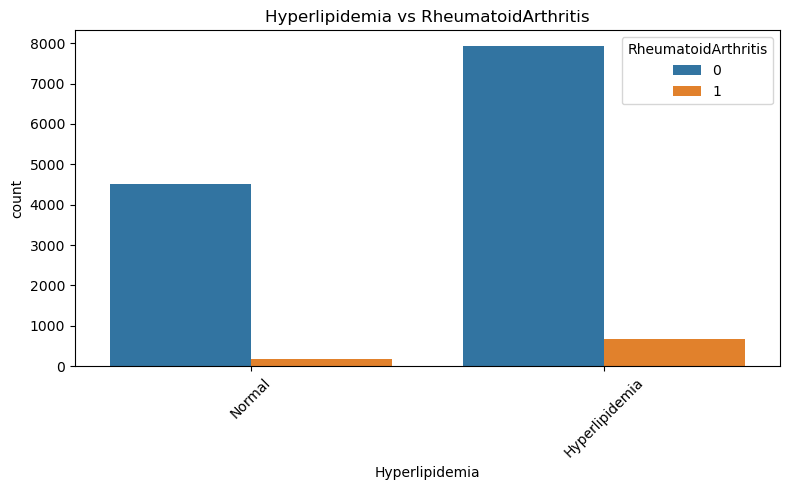

In [1750]:
for col in cat_cols:
    print(f"\n\n===== {col} vs RheumatoidArthritis =====")
    
    ct = pd.crosstab(df[col], df['RheumatoidArthritis'])
    print("\nCounts:")
    print(ct)
    
    print("\nPercentage Row-wise:")
    print(ct.div(ct.sum(axis=1), axis=0) * 100)
    
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x=col, hue='RheumatoidArthritis')
    plt.xticks(rotation=45)
    plt.title(f"{col} vs RheumatoidArthritis")
    plt.tight_layout()
    plt.show()

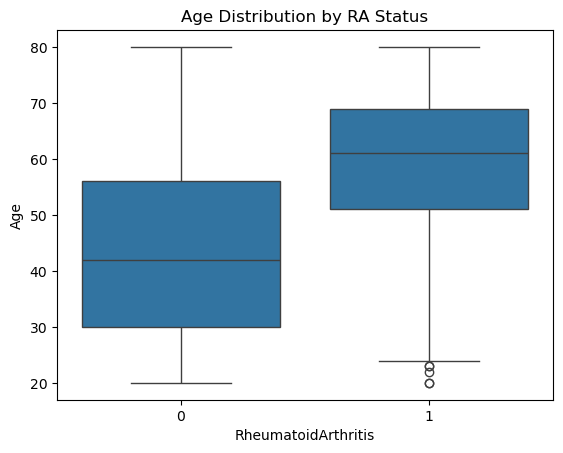

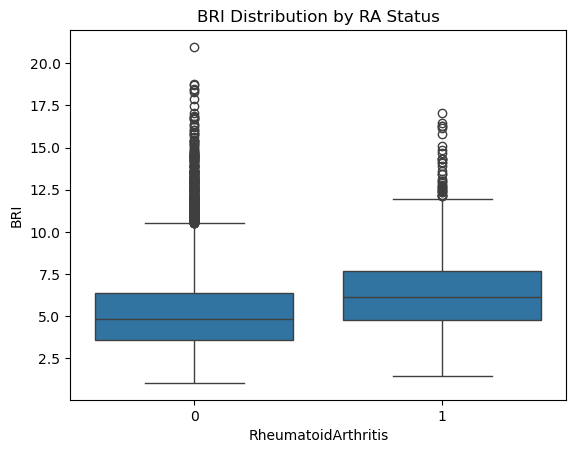

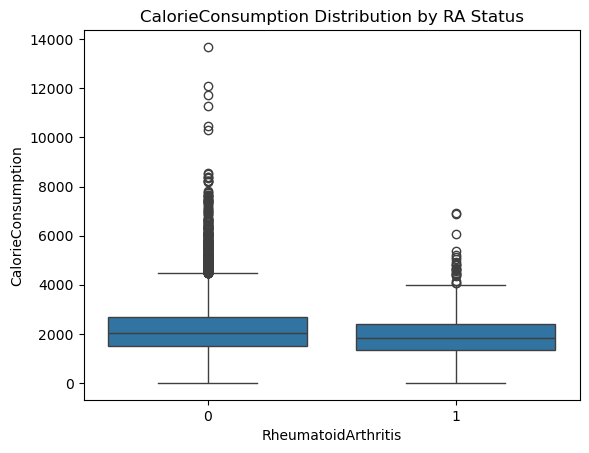

In [1751]:
for col in ['Age','BRI','CalorieConsumption']:
    sns.boxplot(data=df, x='RheumatoidArthritis', y=col)
    plt.title(f"{col} Distribution by RA Status")
    plt.show()

<Axes: xlabel='RheumatoidArthritis', ylabel='count'>

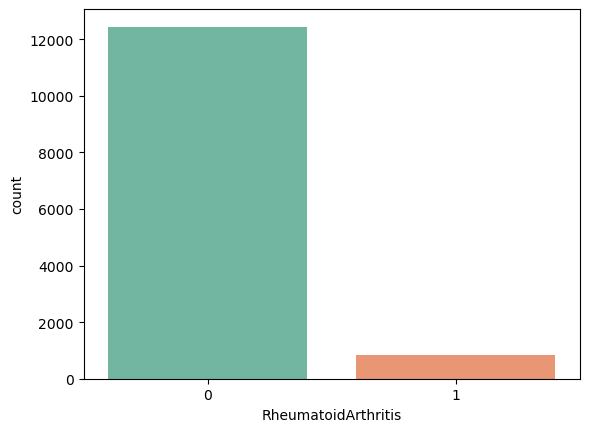

In [1752]:
sns.countplot(data=df, x="RheumatoidArthritis", palette='Set2')

# Data Preprocessing & Feature Engineering

In [1753]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,30,45,60,100], labels=['Young','Adult','MidAge','Old'])

df['CalorieConsumption'] = df.apply(
    lambda row: df[
        (df['Gender'] == row['Gender']) &
        (df['AgeGroup'] == row['AgeGroup'])
    ]['CalorieConsumption'].median()
    if row['CalorieConsumption'] == 0 else row['CalorieConsumption'],
    axis=1
)

In [1754]:
df.drop(columns=['AgeGroup'], inplace=True)

In [1755]:
Q1 = df['CalorieConsumption'].quantile(0.25)
Q3 = df['CalorieConsumption'].quantile(0.75)
IQR = Q3 - Q1
upper = min(Q3 + 1.5*IQR, df['CalorieConsumption'].quantile(0.995))

df['CalorieConsumption'] = df['CalorieConsumption'].clip(lower=800, upper=upper)

In [1756]:
Q1 = df['BRI'].quantile(0.25)
Q3 = df['BRI'].quantile(0.75)
IQR = Q3 - Q1
upper = min(Q3 + 1.5*IQR, df['BRI'].quantile(0.995))

df['BRI'] = df['BRI'].clip(lower=1.0, upper=upper)

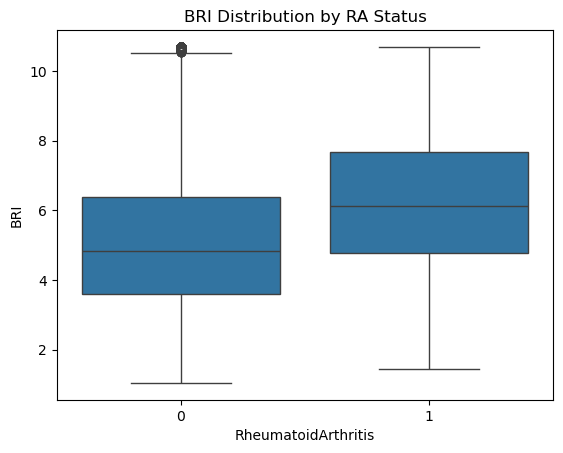

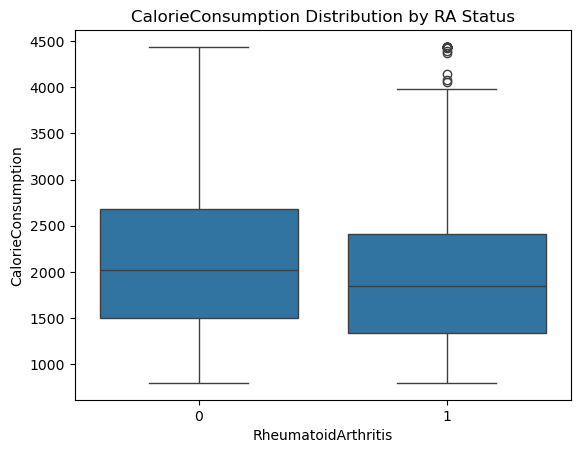

In [1757]:
for col in ['BRI','CalorieConsumption']:
    sns.boxplot(data=df, x='RheumatoidArthritis', y=col)
    plt.title(f"{col} Distribution by RA Status")
    plt.show()

In [1758]:
df['Gender'] = df['Gender'].map({'Male':0,'Female':1})
df['MaritalStatus'] = df['MaritalStatus'].map({'Living Alone':0,'Living With A Partner':1})
df['Hypertension'] = df['Hypertension'].map({'Normal':0,'Hypertension':1})
df['Hyperlipidemia'] = df['Hyperlipidemia'].map({'Normal':0,'Hyperlipidemia':1})

In [1759]:
df['EducationLevel'] = df['EducationLevel'].map({
    'Below high school':0,
    'High school graduate':1,
    'Above high school':2
})

In [1760]:
df['Diabetes'] = df['Diabetes'].map({'Normal':0,'Prediabetes':1,'Diabetes':2})

In [1761]:
df['SmokingStatus'] = df['SmokingStatus'].map({'Never':0,'Former':1,'Current':2})

In [1762]:
df['DrinkingStatus'] = df['DrinkingStatus'].map({
    'Almost non-drinker':2,
    'Occasional drinker':1,
    'Frequent drinker':0
})

In [1763]:
df['FamilyIncome'] = df['FamilyIncome'].map({
    'PIR <= 1.3':0,
    '(1.3,3.5]':1,
    'PIR > 3.5':2
})

In [1764]:
df = pd.get_dummies(df, columns=['Race','PhysicalActivity'], drop_first=True)

In [1765]:
df.shape

(13273, 20)

In [ ]:
X = df.drop('RheumatoidArthritis', axis=1)
y = df['RheumatoidArthritis']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42)

In [ ]:
num_cols = ['Age','BRI','CalorieConsumption','CaffeineConsumption']
scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [1768]:
categorical_cols = [
    col for col in X_train.columns 
    if col not in ['Age','BRI','CalorieConsumption','CaffeineConsumption']
]

categorical_indices = [X_train.columns.get_loc(c) for c in categorical_cols]

smote = SMOTENC(categorical_features=categorical_indices, random_state=42)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Data Modelling & Evaluation

## Logistic Regression

In [1769]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    class_weight='balanced',
    max_iter=5000,
    solver='lbfgs'
)

lr.fit(X_train_res, y_train_res)

LogisticRegression(class_weight='balanced', max_iter=5000)

In [1770]:
test_pred = lr.predict(X_test)
test_prob = lr.predict_proba(X_test)[:, 1]

print("\n===== TEST PERFORMANCE =====")
print("Test Accuracy :", accuracy_score(y_test, test_pred))
print("Test ROC-AUC  :", roc_auc_score(y_test, test_prob))
print("\nTest Classification Report:")
print(classification_report(y_test, test_pred, zero_division=0))



===== TEST PERFORMANCE =====
Test Accuracy : 0.7370668006027122
Test ROC-AUC  : 0.7390730884964987

Test Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.75      0.84      3733
           1       0.14      0.61      0.23       249

    accuracy                           0.74      3982
   macro avg       0.55      0.68      0.53      3982
weighted avg       0.91      0.74      0.80      3982



## RandomForestClassifier

In [1775]:
rf = RandomForestClassifier(
    n_estimators=1000,
    max_depth=15,
    class_weight={0:1, 1:10},
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42
)

rf.fit(X_train_res, y_train_res)

RandomForestClassifier(class_weight={0: 1, 1: 10}, max_depth=15,
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=1000, random_state=42)

In [1776]:
test_pred = rf.predict(X_test)
test_prob = rf.predict_proba(X_test)[:, 1]

print("\n===== TEST PERFORMANCE =====")
print("Test Accuracy :", accuracy_score(y_test, test_pred))
print("Test ROC-AUC  :", roc_auc_score(y_test, test_prob))
print("\nTest Classification Report:")
print(classification_report(y_test, test_pred, zero_division=0))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, test_pred))



===== TEST PERFORMANCE =====
Test Accuracy : 0.6968859869412356
Test ROC-AUC  : 0.7254660216004656

Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.70      0.81      3733
           1       0.12      0.60      0.20       249

    accuracy                           0.70      3982
   macro avg       0.54      0.65      0.51      3982
weighted avg       0.91      0.70      0.77      3982


Confusion Matrix:
[[2625 1108]
 [  99  150]]


## SVC

In [1780]:
svm = LinearSVC(
    class_weight='balanced',
    random_state=42
)

param_grid = {
    'C': [0.01, 0.05, 0.1]
}

grid = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    scoring='f1',
    cv=4,
    n_jobs=-1,
    verbose=2,
    refit=True
)

grid.fit(X_train, y_train)

print("\nBest Params:", grid.best_params_)
print("Best CV F1 Score:", grid.best_score_)

Fitting 4 folds for each of 3 candidates, totalling 12 fits

Best Params: {'C': 0.1}
Best CV F1 Score: 0.25840538775694716


In [1781]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("\n===== TEST PERFORMANCE (Linear SVM) =====")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, best_model.decision_function(X_test)))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))



===== TEST PERFORMANCE (Linear SVM) =====
Accuracy : 0.7149673530889
Precision: 0.143317230273752
Recall   : 0.714859437751004
F1-score : 0.23876592890677398
ROC-AUC  : 0.7696470317379885

Confusion Matrix:
[[2669 1064]
 [  71  178]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82      3733
           1       0.14      0.71      0.24       249

    accuracy                           0.71      3982
   macro avg       0.56      0.71      0.53      3982
weighted avg       0.92      0.71      0.79      3982

